# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [59]:
# Tampilkan 5 baris pertama dengan function head.
# Load Dataset
url= "https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m"
df = pd.read_csv(url)  
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [60]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [61]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000

**Insight** : Dataset Transaksi Keuangan
*Tipe Data, Nilai Kosong, dan Struktur Dataset*
- Dataset memiliki 2.537 baris dan 16 kolom.
- Terdiri dari 11 kolom bertipe object (teks/waktu) dan 5 kolom float64 (numerik).
- Terdapat missing value pada hampir semua kolom, namun jumlahnya relatif kecil (< 2% per kolom) 

In [62]:
# Pilih kolom numerik
numerik_df = df.select_dtypes(include=['int64', 'float64'])

# Tangani missing value dengan mengisi menggunakan rata-rata kolom
numerik_df = numerik_df.fillna(numerik_df.mean())

# Cek hasilnya setelah imputasi
print(numerik_df.head())
print(numerik_df.columns)
print(numerik_df.isnull().sum())  # cek sisa missing value


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09    70.000000                 81.0            1.0   
1             376.24    68.000000                141.0            1.0   
2             126.29    19.000000                 56.0            1.0   
3             184.50    26.000000                 25.0            1.0   
4              13.45    44.678444                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  
Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [63]:
# (Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

# 1. Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# 2. Menampilkan tipe data dan jumlah missing value per kolom
print("Informasi data:")
print(df.info())
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# 3. Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif fitur numerik:")
print(df.describe())

# 4. Visualisasi distribusi kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

numerik_df = df.select_dtypes(include=['int64', 'float64']).fillna(df.mean(numeric_only=True))



Jumlah baris dan kolom: (2537, 16)
Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            25

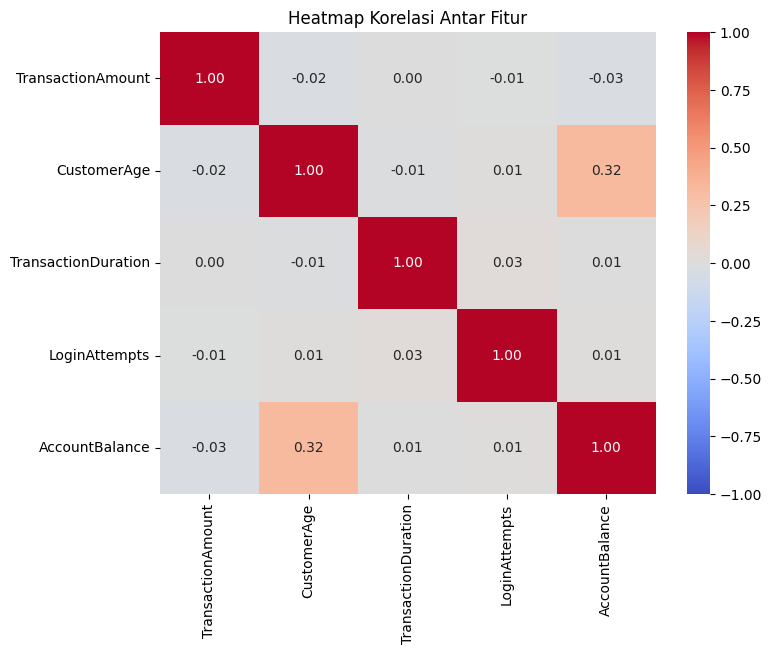

In [64]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi antar fitur numerik (sudah diimputasi sebelumnya)
corr_matrix = numerik_df.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


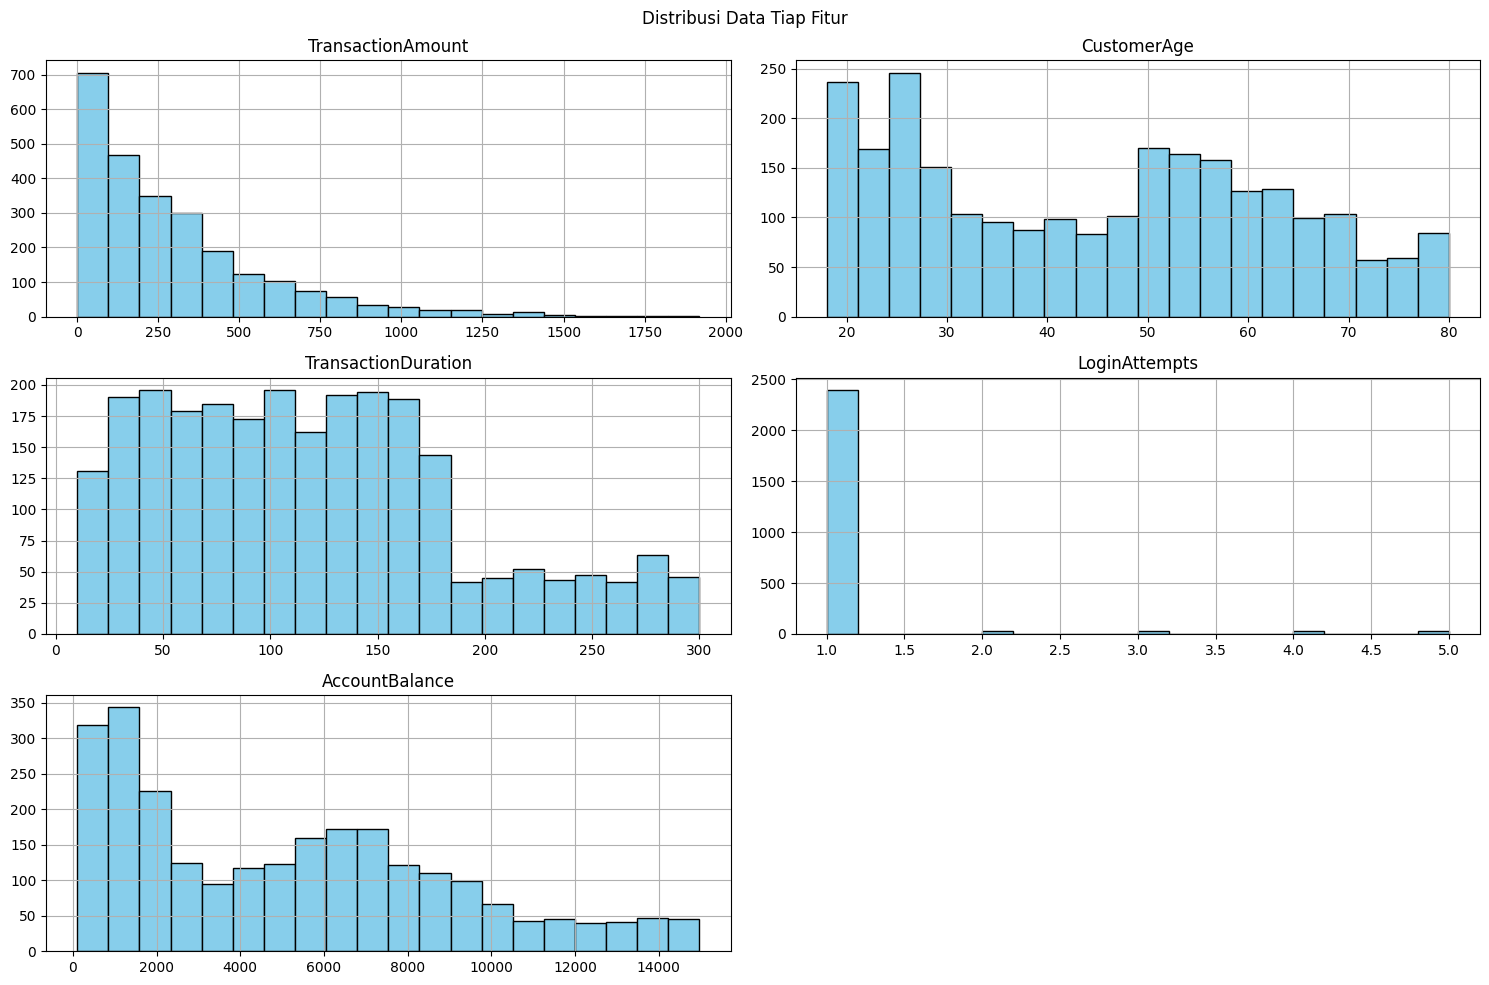

In [65]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Menampilkan histogram untuk semua kolom numerik
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Data Tiap Fitur")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

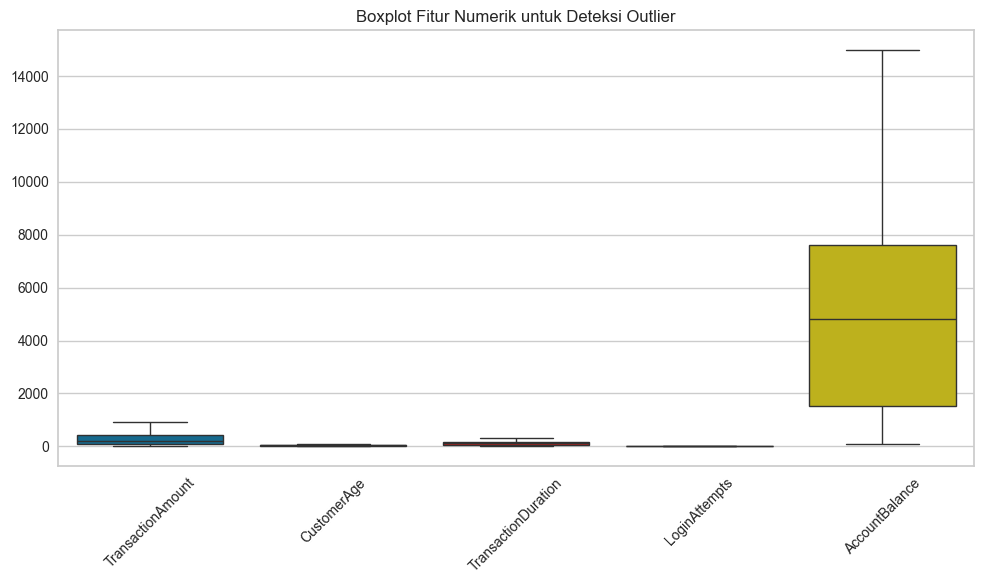

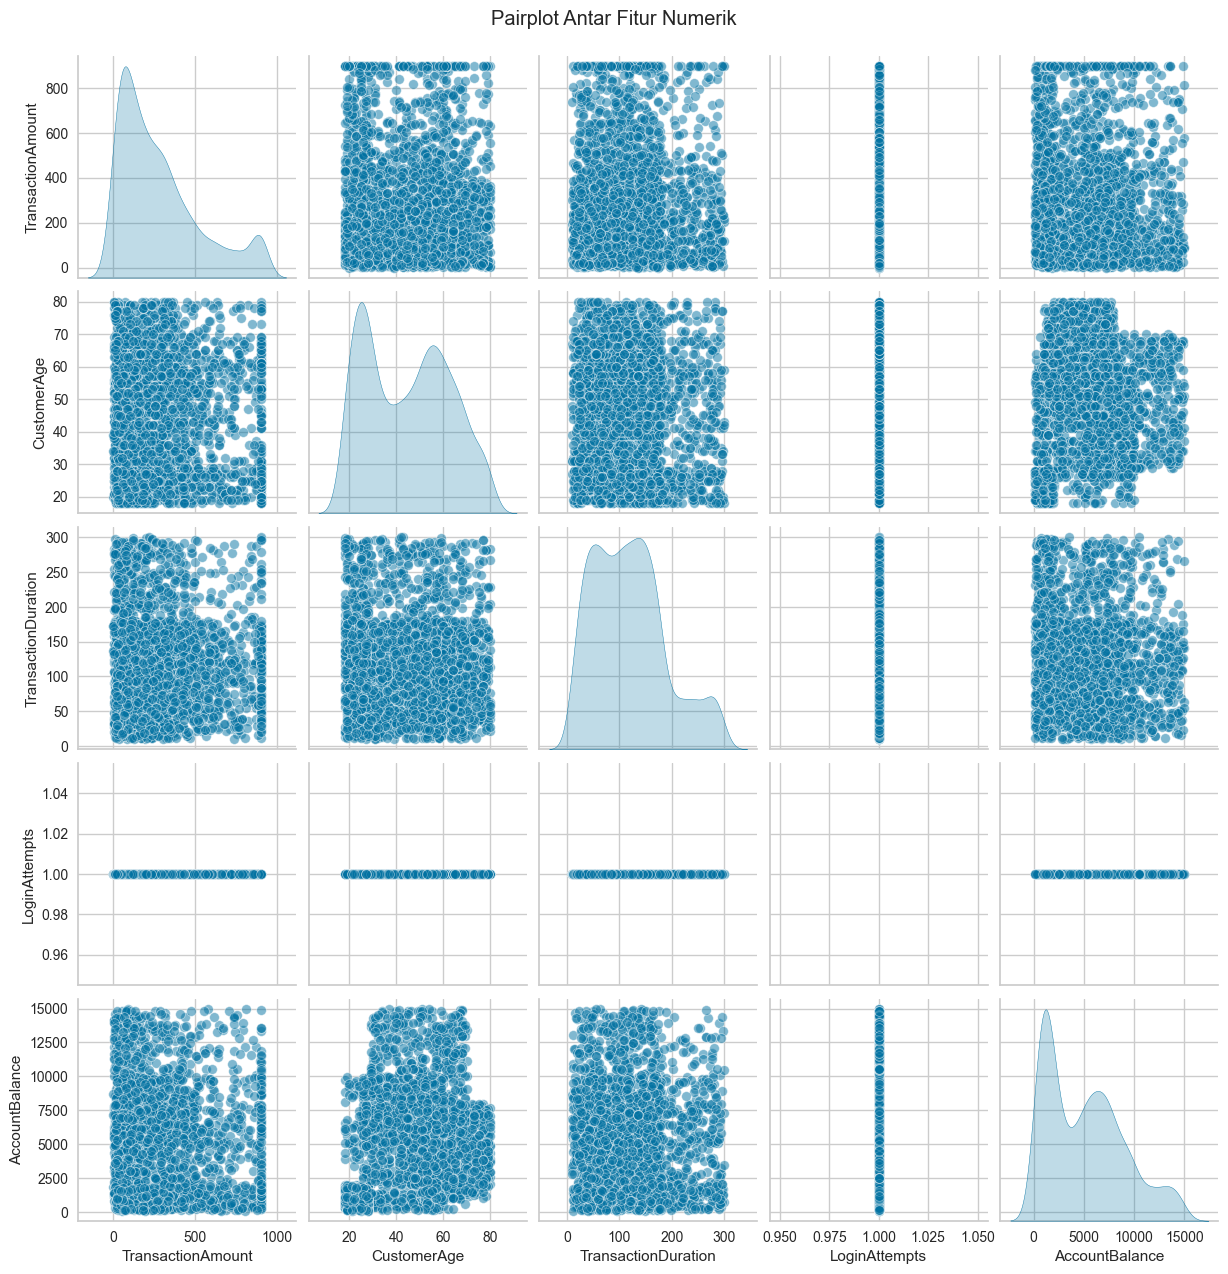

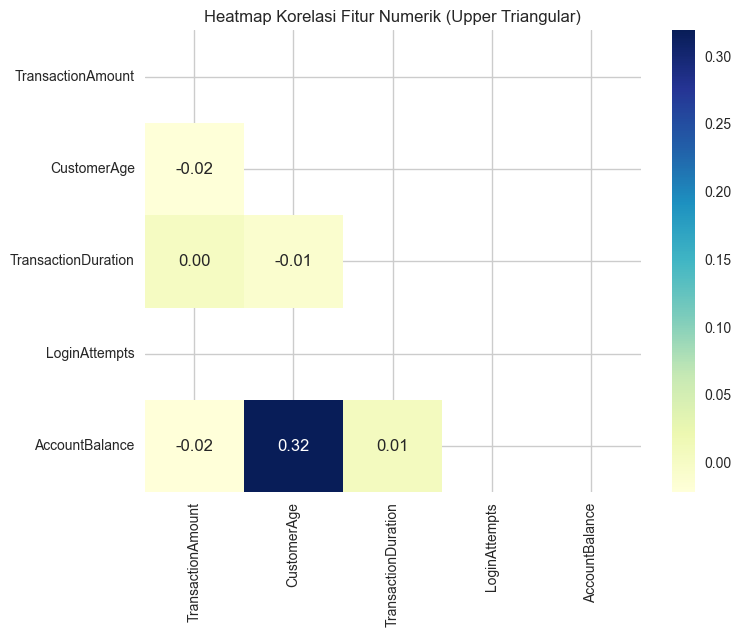

In [119]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Boxplot untuk deteksi outlier ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerik_df)
plt.title('Boxplot Fitur Numerik untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Pairplot untuk melihat hubungan antar fitur ---
sns.pairplot(numerik_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot Antar Fitur Numerik", y=1.02)
plt.show()

# --- 3. Korelasi heatmap dengan masking (upper triangle) ---
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(numerik_df.corr(), dtype=bool))
sns.heatmap(numerik_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f", mask=mask)
plt.title('Heatmap Korelasi Fitur Numerik (Upper Triangular)')
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [67]:
# Mengecek dataset menggunakan isnull().sum()
# Mengecek jumlah missing value per kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [68]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
21


**Menanggani Duplikat Data**

In [69]:
# Menghapus data duplikat

df = df.drop_duplicates()
print("Jumlah data setelah menghapus duplikat:", df.shape)

Jumlah data setelah menghapus duplikat: (2516, 16)


**Menanggani Missing Value**

In [70]:
# Pisahkan kolom numerik dan kategorikal
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns
kategorikal_cols = df.select_dtypes(include=['object']).columns

# Imputasi missing value pada kolom numerik dengan mean
df[numerik_cols] = df[numerik_cols].fillna(df[numerik_cols].mean())

# Imputasi missing value pada kolom kategorikal dengan modus
for col in kategorikal_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Cek kembali missing value setelah imputasi
print("\nJumlah missing value per kolom setelah imputasi:")
print(df.isnull().sum())



Jumlah missing value per kolom setelah imputasi:
TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [71]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()

# Lakukan scaling pada kolom numerik
df[numerik_cols] = scaler.fit_transform(df[numerik_cols])

# Tampilkan 5 baris pertama hasil scaling
print(df[numerik_cols].head())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874     0.429757             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
4        0.492591  


**insight dari hasil scaling MinMax :**
1. Semua nilai fitur numerik sudah diskalakan ke rentang 0 sampai 1.
    - Ini memudahkan algoritma machine learning agar fitur-fitur tersebut sebanding dalam skala yang sama.

2. Distribusi nilai yang sudah diskalakan:
    - Nilai yang kecil seperti 0.006-0.007 untuk TransactionAmount mengindikasikan transaksi yang kecil dibanding keseluruhan.
    - Nilai besar seperti 0.9 pada AccountBalance mengindikasikan saldo akun yang tinggi.



In [72]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=[
    'TransactionID',
    'AccountID',
    'DeviceID',
    'MerchantID',
    'IP Address'
], inplace=True)


In [120]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melakukan encoding.

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal (tipe object)
kategorikal_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi encoder
le = LabelEncoder()

# Loop encoding setiap kolom kategorikal
for col in kategorikal_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # pastikan tipe string agar tidak error

# Tampilkan 5 baris pertama setelah encoding
print(df.head())


   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0           0.007207              680                1        36        0   
1           0.195940             1178                1        15        0   
2           0.065680             1262                1        23        2   
3           0.096016              818                1        33        2   
4           0.006874             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                   0             0.244828            0.0   
1     0.806452                   0             0.451724            0.0   
2     0.016129                   3             0.158621            0.0   
3     0.129032                   3             0.051724            0.0   
4     0.429757                   3             0.648276            0.0   

   AccountBalance  PreviousTransactionDate TransactionAmount_binned  \
0        0.336832    

In [74]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

In [75]:
print(df.columns.tolist())


['TransactionAmount', 'TransactionDate', 'TransactionType', 'Location', 'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Imputasi Missing Value**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Numerik: imputasi mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Kategorikal: imputasi modus
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values setelah imputasi:")
print(df.isnull().sum())


Missing values setelah imputasi:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [77]:
# Menghapus data duplikat menggunakan drop_duplicates().

# Hapus data duplikat jika ada
df = df.drop_duplicates()
print("\nData setelah hapus duplikat:", df.shape)



Data setelah hapus duplikat: (2515, 11)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [78]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

import pandas as pd
import numpy as np

# Copy data numerik biar aman
df_outlier = numerik_df.copy()

# Fungsi hitung outlier per kolom berdasarkan IQR
def detect_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col < lower_bound) | (col > upper_bound), lower_bound, upper_bound

# Threshold jumlah outlier untuk memutuskan drop atau capping
threshold = 20

# Simpan index baris yang outlier untuk drop
rows_to_drop = set()

# Loop tiap kolom numerik
for col in df_outlier.columns:
    outlier_mask, lower, upper = detect_outliers_iqr(df_outlier[col])
    n_outliers = outlier_mask.sum()
    print(f"Kolom '{col}' punya {n_outliers} outlier.")
    
    if n_outliers == 0:
        continue  # tidak ada outlier, lanjut
    
    if n_outliers < threshold:
        # Kalo sedikit, kumpulkan index baris outlier untuk nanti di-drop
        outlier_indices = df_outlier.index[outlier_mask].tolist()
        rows_to_drop.update(outlier_indices)
        print(f"  Drop {n_outliers} baris outlier di kolom '{col}'")
    else:
        # Kalo banyak, lakukan capping (winsorizing)
        print(f"  Lakukan capping outlier di kolom '{col}'")
        df_outlier.loc[df_outlier[col] < lower, col] = lower
        df_outlier.loc[df_outlier[col] > upper, col] = upper

# Drop semua baris outlier yang sudah terkumpul
print(f"\nTotal baris yang akan di-drop karena outlier: {len(rows_to_drop)}")
df_outlier_cleaned = df_outlier.drop(index=rows_to_drop).reset_index(drop=True)

print(f"\nJumlah data sebelum pembersihan outlier: {numerik_df.shape}")
print(f"Jumlah data setelah pembersihan outlier: {df_outlier_cleaned.shape}")

# Update numerik_df dengan data bersih outlier
numerik_df = df_outlier_cleaned


Kolom 'TransactionAmount' punya 114 outlier.
  Lakukan capping outlier di kolom 'TransactionAmount'
Kolom 'CustomerAge' punya 0 outlier.
Kolom 'TransactionDuration' punya 0 outlier.
Kolom 'LoginAttempts' punya 141 outlier.
  Lakukan capping outlier di kolom 'LoginAttempts'
Kolom 'AccountBalance' punya 0 outlier.

Total baris yang akan di-drop karena outlier: 0

Jumlah data sebelum pembersihan outlier: (2537, 5)
Jumlah data setelah pembersihan outlier: (2537, 5)


**Insight :**
- Outlier sudah ditangani dengan baik menggunakan metode hybrid (drop sedikit, capping banyak).
- Dataset sudah lebih bersih dan siap untuk pemodelan atau analisis lanjut tanpa khawatir outlier merusak hasil.

In [81]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Binning pada kolom 'TransactionAmount' (nilai sudah antara 0 dan 1)
bins_amount = [-0.01, 0.1, 0.3, 0.6, 1.01]  # rentang bins harus monotonik naik
labels_amount = ['Very Low', 'Low', 'Medium', 'High']
df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Binning pada kolom 'CustomerAge' (nilai sudah antara 0 dan 1)
bins_age = [-0.01, 0.2, 0.4, 0.6, 1.01]
labels_age = ['Young', 'Adult', 'Middle Age', 'Senior']
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode hasil binning
df['TransactionAmount_binned_encoded'] = le.fit_transform(df['TransactionAmount_binned'].astype(str))
df['CustomerAge_binned_encoded'] = le.fit_transform(df['CustomerAge_binned'].astype(str))

# Tampilkan hasil binning dan encoding
print(df[['TransactionAmount', 'TransactionAmount_binned', 'TransactionAmount_binned_encoded']].head())
print(df[['CustomerAge', 'CustomerAge_binned', 'CustomerAge_binned_encoded']].head())


   TransactionAmount TransactionAmount_binned  \
0           0.007207                 Very Low   
1           0.195940                      Low   
2           0.065680                 Very Low   
3           0.096016                 Very Low   
4           0.006874                 Very Low   

   TransactionAmount_binned_encoded  
0                                 3  
1                                 1  
2                                 3  
3                                 3  
4                                 3  
   CustomerAge CustomerAge_binned  CustomerAge_binned_encoded
0     0.838710             Senior                           2
1     0.806452             Senior                           2
2     0.016129              Young                           3
3     0.129032              Young                           3
4     0.429757         Middle Age                           1


C:\Users\ADVAN\AppData\Local\Temp\ipykernel_11860\2102107014.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionAmount_binned', data=df, palette='pastel',
C:\Users\ADVAN\AppData\Local\Temp\ipykernel_11860\2102107014.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerAge_binned', data=df, palette='pastel',


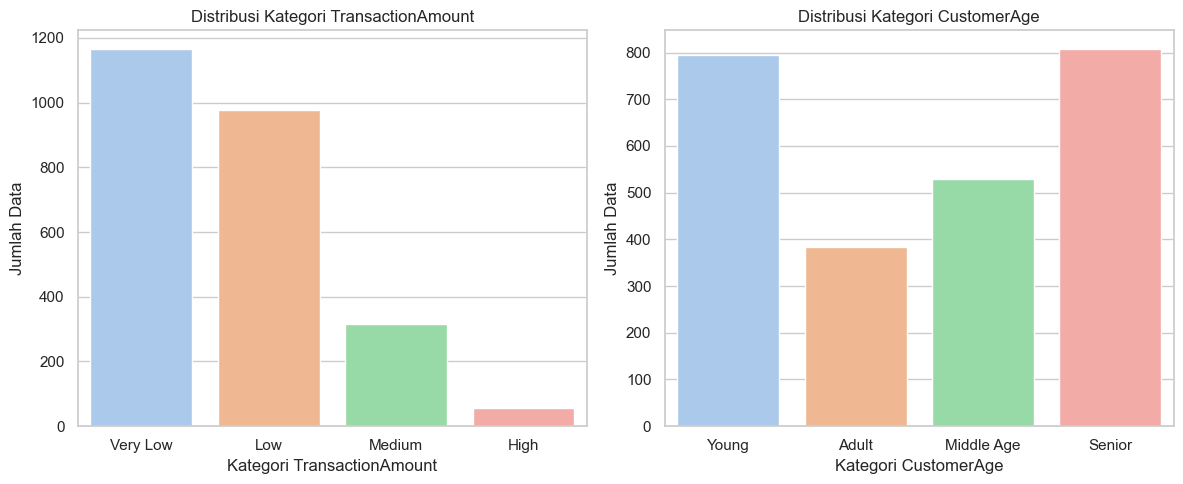

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur style seaborn
sns.set(style="whitegrid")

# Plot distribusi TransactionAmount_binned
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='TransactionAmount_binned', data=df, palette='pastel',
              order=['Very Low', 'Low', 'Medium', 'High'])
plt.title('Distribusi Kategori TransactionAmount')
plt.xlabel('Kategori TransactionAmount')
plt.ylabel('Jumlah Data')

# Plot distribusi CustomerAge_binned
plt.subplot(1,2,2)
sns.countplot(x='CustomerAge_binned', data=df, palette='pastel',
              order=['Young', 'Adult', 'Middle Age', 'Senior'])
plt.title('Distribusi Kategori CustomerAge')
plt.xlabel('Kategori CustomerAge')
plt.ylabel('Jumlah Data')

plt.tight_layout()
plt.show()


**Insight dari Binning dan Distribusi Kategori :**
1. Transaction Amount (Jumlah Transaksi)
- Mayoritas transaksi berada di kategori Very Low dan Low, artinya sebagian besar transaksi memiliki nilai kecil.
- Kategori Medium dan High jauh lebih sedikit, menandakan transaksi bernilai besar relatif jarang.
- Ini bisa menunjukkan bahwa pelanggan lebih sering melakukan transaksi kecil atau rutin daripada transaksi besar sekaligus.

2. Customer Age (Usia Pelanggan)
- Sebagian besar pelanggan masuk kategori usia Senior dan Middle Age, dengan jumlah pelanggan usia muda (Young) dan dewasa (Adult) lebih sedikit.
- Hal ini mengindikasikan bahwa produk atau layanan ini lebih banyak digunakan oleh kelompok usia menengah ke atas.
- Bisa jadi strategi pemasaran atau fitur layanan perlu lebih disesuaikan agar menarik pelanggan yang lebih muda.


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [83]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()


TransactionAmount  TransactionDate  TransactionType     Location  \
count        2515.000000      2515.000000      2515.000000  2515.000000   
mean            0.155028      1233.843738         0.776143    20.928429   
std             0.151664       718.117201         0.416910    12.194902   
min             0.000000         0.000000         0.000000     0.000000   
25%             0.043180       600.500000         1.000000    11.000000   
50%             0.111087      1228.000000         1.000000    21.000000   
75%             0.213326      1856.500000         1.000000    31.000000   
max             1.000000      2484.000000         1.000000    42.000000   

           Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  2515.000000  2515.000000         2515.000000          2515.000000   
mean      0.989264     0.429575            1.521272             0.377701   
std       0.804401     0.286277            1.134477             0.240111   
min       0.000000     0.000000            0.000000             0.000000   
25%       0.000000     0.145161            0.500000             0.182759   
50%       1.000000     0.435484            2.000000             0.358621   
75%       2.000000     0.661290            3.000000             0.520690   
max       2.000000     1.000000            3.000000             1.000000   

       LoginAttempts  AccountBalance  PreviousTransactionDate  \
count    2515.000000     2515.000000              2515.000000   
mean        0.030674        0.337135               179.071571   
std         0.148619        0.260618               102.459964   
min         0.000000        0.000000                 0.000000   
25%         0.000000        0.095324                91.000000   
50%         0.000000        0.318555               178.000000   
75%         0.000000        0.506842               269.000000   
max         1.000000        1.000000               359.000000   

       TransactionAmount_binned_encoded  CustomerAge_binned_encoded  
count                       2515.000000                 2515.000000  
mean                           2.030616                    1.800795  
std                            0.969019                    1.047252  
min                            0.000000                    0.000000  
25%                            1.000000                    1.000000  
50%                            2.000000                    2.000000  
75%                            3.000000                    3.000000  
max                            3.000000                    3.000000

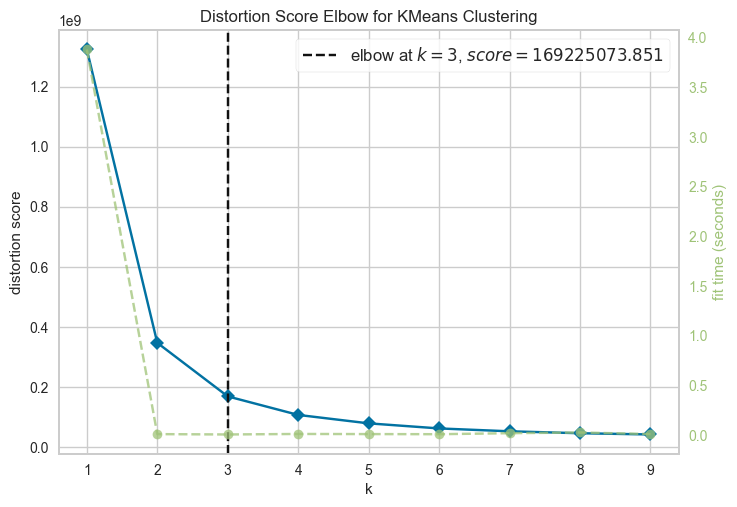

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Pilih fitur yang akan digunakan untuk clustering
features = df.select_dtypes(include=['float64', 'int64'])

# Visualisasi Elbow Method untuk menentukan jumlah cluster terbaik (misal range 1-10)
visualizer = KElbowVisualizer(model, k=(1,10))

# Fit data ke visualizer
visualizer.fit(features)

# Tampilkan plot
visualizer.show()


In [87]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans

# Misalnya hasil dari Elbow Method menunjukkan jumlah cluster optimal adalah 3
n_clusters = 3

# Inisialisasi dan latih model KMeans
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
model_kmeans.fit(features)

# Tambahkan hasil cluster ke DataFrame
df['Cluster'] = model_kmeans.labels_

# Tampilkan hasil cluster pertama
print(df[['Cluster']].value_counts())


Cluster
0          856
1          831
2          828
Name: count, dtype: int64


**Insight :**
- Distribusi antar cluster sangat seimbang, yang menunjukkan bahwa fitur-fitur yang digunakan untuk clustering memiliki pembeda yang cukup merata.
- Ini bagus karena tidak terjadi dominasi satu cluster yang bisa menunjukkan bias atau kurangnya perbedaan fitur antar kelompok.

Jalankan cell code ini untuk menyimpan model kamu.

In [88]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")


import joblib
joblib.dump(model_kmeans, "model_clustering.h5")


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [89]:
# Menghitung dan menampilkan nilai Silhouette Score.

from sklearn.metrics import silhouette_score

# Menghitung silhouette score
score = silhouette_score(features, model_kmeans.labels_)

# Tampilkan nilai silhouette score
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5426


**Insight Tambahan :**
- Model KMeans dengan 3 cluster berhasil membagi data menjadi kelompok yang cukup terpisah dengan silhouette score > 0.5.
- Clustering ini bisa digunakan untuk segmentasi pengguna, perilaku transaksi, atau anomali sederhana berdasarkan kesamaan fitur.

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
# Load Dataset
url= "https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m"
df = pd.read_csv(url)  
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000

**Insight** : Dataset Transaksi Keuangan
*Tipe Data, Nilai Kosong, dan Struktur Dataset*
- Dataset memiliki 2.537 baris dan 16 kolom.
- Terdiri dari 11 kolom bertipe object (teks/waktu) dan 5 kolom float64 (numerik).
- Terdapat missing value pada hampir semua kolom, namun jumlahnya relatif kecil (< 2% per kolom) 

In [ ]:
# Pilih kolom numerik
numerik_df = df.select_dtypes(include=['int64', 'float64'])

# Tangani missing value dengan mengisi menggunakan rata-rata kolom
numerik_df = numerik_df.fillna(numerik_df.mean())

# Cek hasilnya setelah imputasi
print(numerik_df.head())
print(numerik_df.columns)
print(numerik_df.isnull().sum())  # cek sisa missing value


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09    70.000000                 81.0            1.0   
1             376.24    68.000000                141.0            1.0   
2             126.29    19.000000                 56.0            1.0   
3             184.50    26.000000                 25.0            1.0   
4              13.45    44.678444                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  
Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# (Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

# 1. Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# 2. Menampilkan tipe data dan jumlah missing value per kolom
print("Informasi data:")
print(df.info())
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# 3. Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif fitur numerik:")
print(df.describe())

# 4. Visualisasi distribusi kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

numerik_df = df.select_dtypes(include=['int64', 'float64']).fillna(df.mean(numeric_only=True))



Jumlah baris dan kolom: (2537, 16)
Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            25

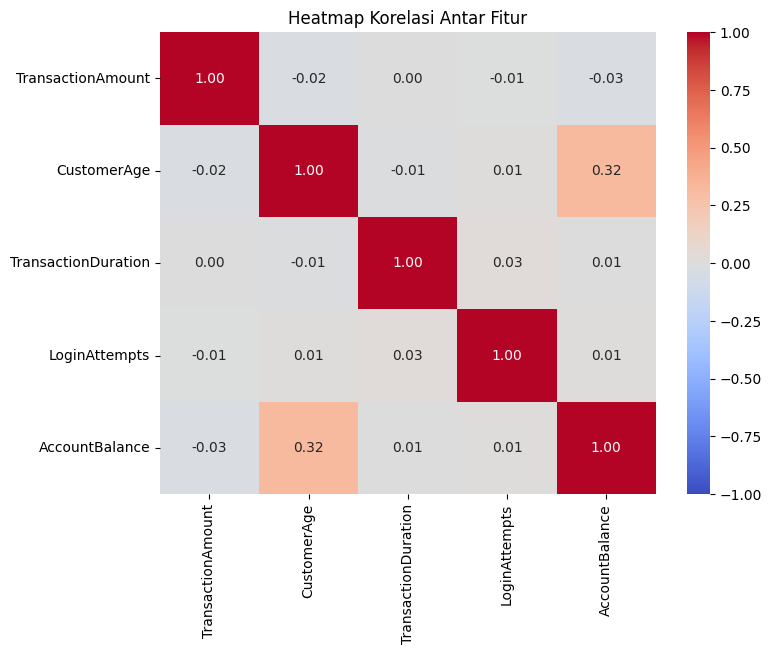

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi antar fitur numerik (sudah diimputasi sebelumnya)
corr_matrix = numerik_df.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


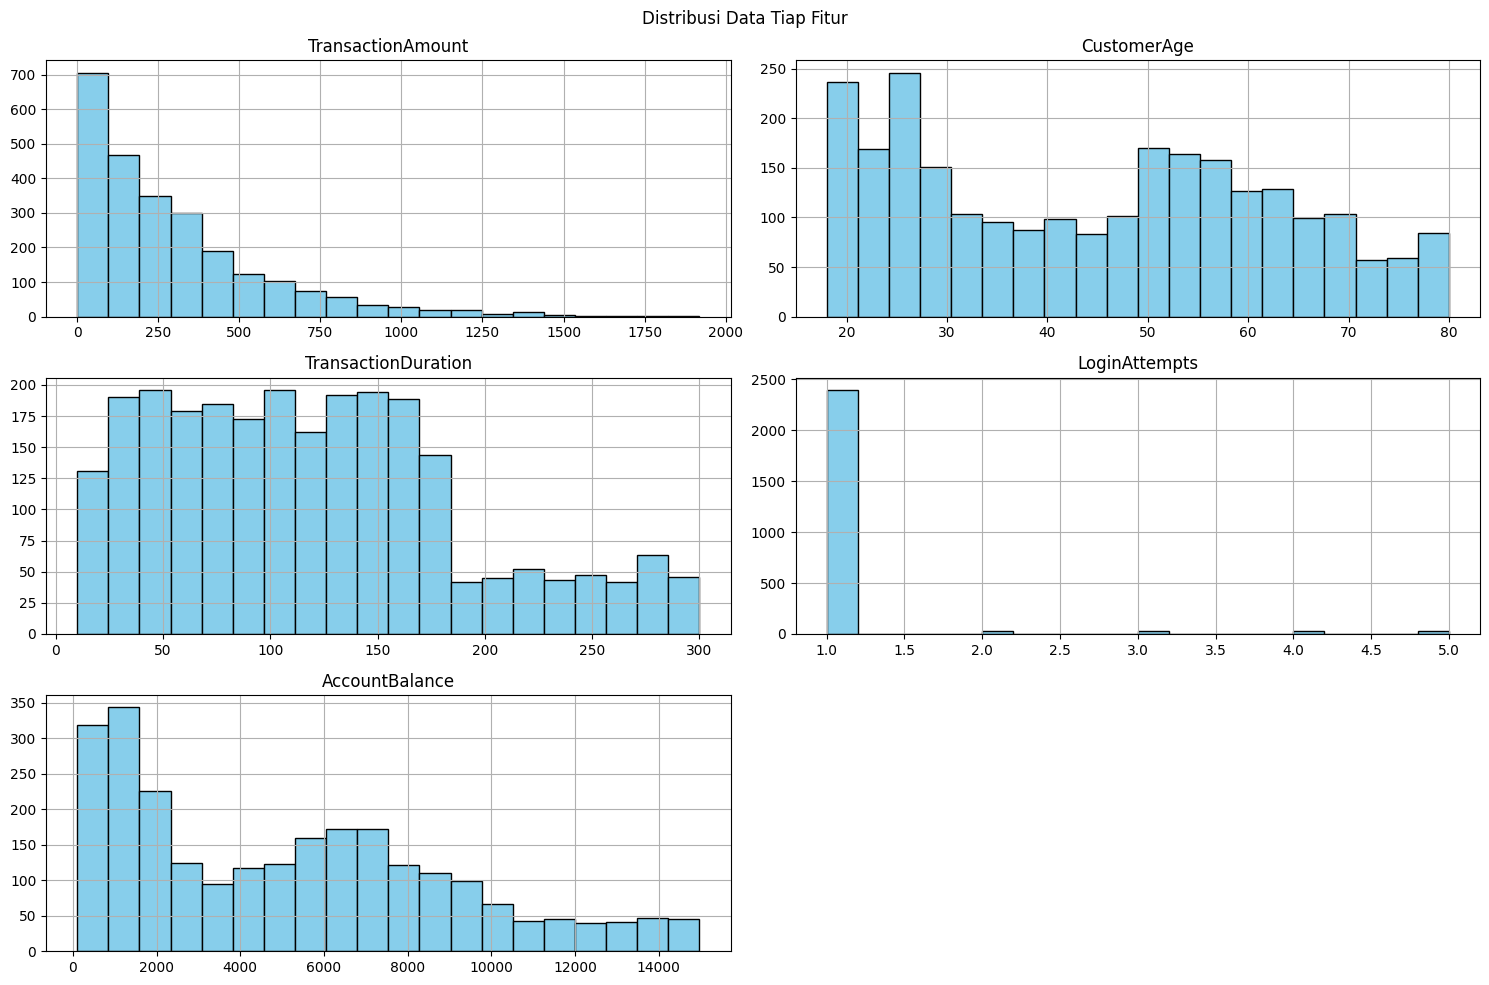

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Menampilkan histogram untuk semua kolom numerik
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Data Tiap Fitur")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

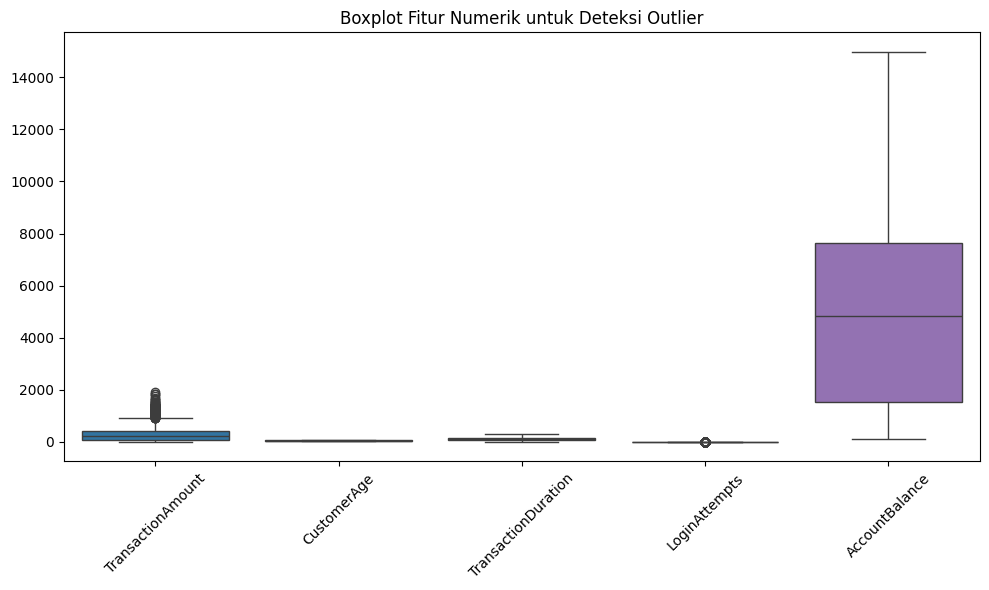

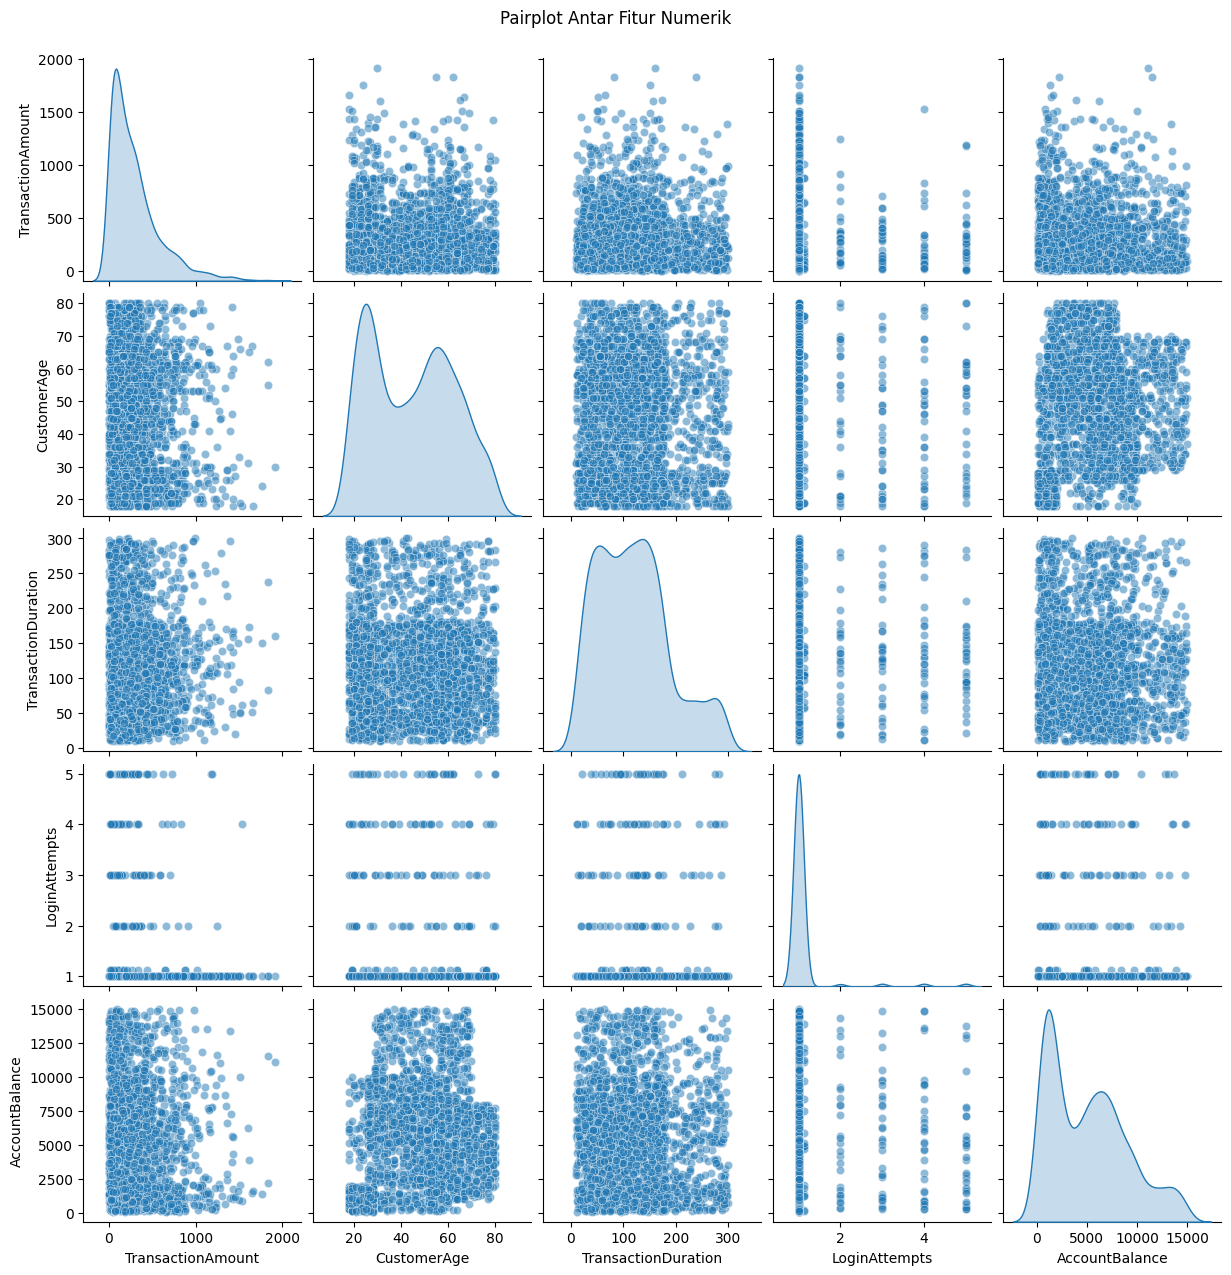

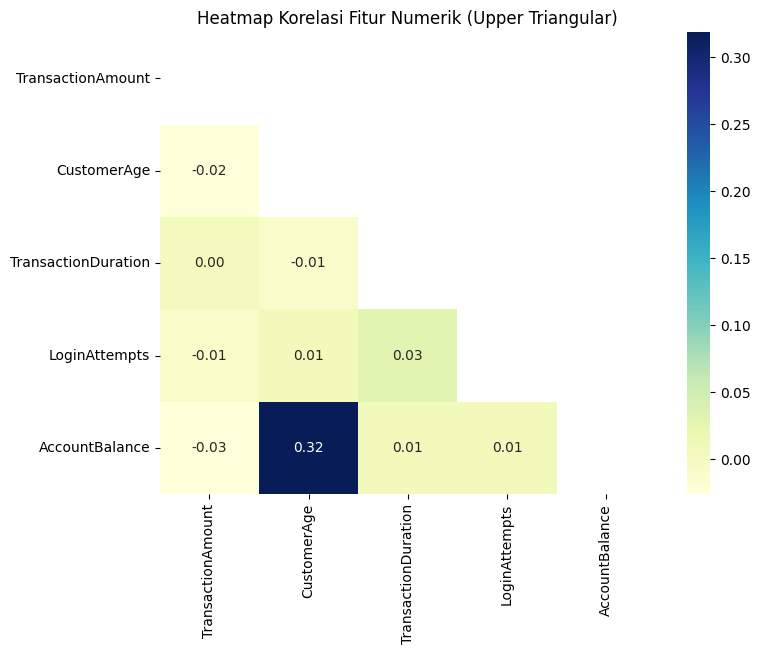

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Boxplot untuk deteksi outlier ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerik_df)
plt.title('Boxplot Fitur Numerik untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Pairplot untuk melihat hubungan antar fitur ---
sns.pairplot(numerik_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot Antar Fitur Numerik", y=1.02)
plt.show()

# --- 3. Korelasi heatmap dengan masking (upper triangle) ---
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(numerik_df.corr(), dtype=bool))
sns.heatmap(numerik_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f", mask=mask)
plt.title('Heatmap Korelasi Fitur Numerik (Upper Triangular)')
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
# Mengecek jumlah missing value per kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
21


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()

# Lakukan scaling pada kolom numerik
df[numerik_cols] = scaler.fit_transform(df[numerik_cols])

# Tampilkan 5 baris pertama hasil scaling
print(df[numerik_cols].head())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874     0.429757             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
4        0.492591  


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=[
    'TransactionID',
    'AccountID',
    'DeviceID',
    'MerchantID',
    'IP Address'
], inplace=True)


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melakukan encoding.

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal (tipe object)
kategorikal_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi encoder
le = LabelEncoder()

# Loop encoding setiap kolom kategorikal
for col in kategorikal_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # pastikan tipe string agar tidak error

# Tampilkan 5 baris pertama setelah encoding
print(df.head())


   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0           0.007207              680                1        36        0   
1           0.195940             1178                1        15        0   
2           0.065680             1262                1        23        2   
3           0.096016              818                1        33        2   
4           0.006874             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                   0             0.244828            0.0   
1     0.806452                   0             0.451724            0.0   
2     0.016129                   3             0.158621            0.0   
3     0.129032                   3             0.051724            0.0   
4     0.429757                   3             0.648276            0.0   

   AccountBalance  PreviousTransactionDate  
0        0.336832                      105  
1 

In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Numerik: imputasi mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Kategorikal: imputasi modus
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values setelah imputasi:")
print(df.isnull().sum())


Missing values setelah imputasi:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

# Hapus data duplikat jika ada
df = df.drop_duplicates()
print("\nData setelah hapus duplikat:", df.shape)



Data setelah hapus duplikat: (2515, 11)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

import pandas as pd
import numpy as np

# Copy data numerik biar aman
df_outlier = numerik_df.copy()

# Fungsi hitung outlier per kolom berdasarkan IQR
def detect_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col < lower_bound) | (col > upper_bound), lower_bound, upper_bound

# Threshold jumlah outlier untuk memutuskan drop atau capping
threshold = 20

# Simpan index baris yang outlier untuk drop
rows_to_drop = set()

# Loop tiap kolom numerik
for col in df_outlier.columns:
    outlier_mask, lower, upper = detect_outliers_iqr(df_outlier[col])
    n_outliers = outlier_mask.sum()
    print(f"Kolom '{col}' punya {n_outliers} outlier.")
    
    if n_outliers == 0:
        continue  # tidak ada outlier, lanjut
    
    if n_outliers < threshold:
        # Kalo sedikit, kumpulkan index baris outlier untuk nanti di-drop
        outlier_indices = df_outlier.index[outlier_mask].tolist()
        rows_to_drop.update(outlier_indices)
        print(f"  Drop {n_outliers} baris outlier di kolom '{col}'")
    else:
        # Kalo banyak, lakukan capping (winsorizing)
        print(f"  Lakukan capping outlier di kolom '{col}'")
        df_outlier.loc[df_outlier[col] < lower, col] = lower
        df_outlier.loc[df_outlier[col] > upper, col] = upper

# Drop semua baris outlier yang sudah terkumpul
print(f"\nTotal baris yang akan di-drop karena outlier: {len(rows_to_drop)}")
df_outlier_cleaned = df_outlier.drop(index=rows_to_drop).reset_index(drop=True)

print(f"\nJumlah data sebelum pembersihan outlier: {numerik_df.shape}")
print(f"Jumlah data setelah pembersihan outlier: {df_outlier_cleaned.shape}")

# Update numerik_df dengan data bersih outlier
numerik_df = df_outlier_cleaned


Kolom 'TransactionAmount' punya 114 outlier.
  Lakukan capping outlier di kolom 'TransactionAmount'
Kolom 'CustomerAge' punya 0 outlier.
Kolom 'TransactionDuration' punya 0 outlier.
Kolom 'LoginAttempts' punya 141 outlier.
  Lakukan capping outlier di kolom 'LoginAttempts'
Kolom 'AccountBalance' punya 0 outlier.

Total baris yang akan di-drop karena outlier: 0

Jumlah data sebelum pembersihan outlier: (2537, 5)
Jumlah data setelah pembersihan outlier: (2537, 5)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Binning pada kolom 'TransactionAmount' (nilai sudah antara 0 dan 1)
bins_amount = [-0.01, 0.1, 0.3, 0.6, 1.01]  # rentang bins harus monotonik naik
labels_amount = ['Very Low', 'Low', 'Medium', 'High']
df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Binning pada kolom 'CustomerAge' (nilai sudah antara 0 dan 1)
bins_age = [-0.01, 0.2, 0.4, 0.6, 1.01]
labels_age = ['Young', 'Adult', 'Middle Age', 'Senior']
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode hasil binning
df['TransactionAmount_binned_encoded'] = le.fit_transform(df['TransactionAmount_binned'].astype(str))
df['CustomerAge_binned_encoded'] = le.fit_transform(df['CustomerAge_binned'].astype(str))

# Tampilkan hasil binning dan encoding
print(df[['TransactionAmount', 'TransactionAmount_binned', 'TransactionAmount_binned_encoded']].head())
print(df[['CustomerAge', 'CustomerAge_binned', 'CustomerAge_binned_encoded']].head())


   TransactionAmount TransactionAmount_binned  \
0           0.007207                 Very Low   
1           0.195940                      Low   
2           0.065680                 Very Low   
3           0.096016                 Very Low   
4           0.006874                 Very Low   

   TransactionAmount_binned_encoded  
0                                 3  
1                                 1  
2                                 3  
3                                 3  
4                                 3  
   CustomerAge CustomerAge_binned  CustomerAge_binned_encoded
0     0.838710             Senior                           2
1     0.806452             Senior                           2
2     0.016129              Young                           3
3     0.129032              Young                           3
4     0.429757         Middle Age                           1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()


TransactionAmount  TransactionDate  TransactionType     Location  \
count        2515.000000      2515.000000      2515.000000  2515.000000   
mean            0.155028      1233.843738         0.776143    20.928429   
std             0.151664       718.117201         0.416910    12.194902   
min             0.000000         0.000000         0.000000     0.000000   
25%             0.043180       600.500000         1.000000    11.000000   
50%             0.111087      1228.000000         1.000000    21.000000   
75%             0.213326      1856.500000         1.000000    31.000000   
max             1.000000      2484.000000         1.000000    42.000000   

           Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  2515.000000  2515.000000         2515.000000          2515.000000   
mean      0.989264     0.429575            1.521272             0.377701   
std       0.804401     0.286277            1.134477             0.240111   
min       0.000000     0.000000            0.000000             0.000000   
25%       0.000000     0.145161            0.500000             0.182759   
50%       1.000000     0.435484            2.000000             0.358621   
75%       2.000000     0.661290            3.000000             0.520690   
max       2.000000     1.000000            3.000000             1.000000   

       LoginAttempts  AccountBalance  PreviousTransactionDate  \
count    2515.000000     2515.000000              2515.000000   
mean        0.030674        0.337135               179.071571   
std         0.148619        0.260618               102.459964   
min         0.000000        0.000000                 0.000000   
25%         0.000000        0.095324                91.000000   
50%         0.000000        0.318555               178.000000   
75%         0.000000        0.506842               269.000000   
max         1.000000        1.000000               359.000000   

       TransactionAmount_binned_encoded  CustomerAge_binned_encoded  
count                       2515.000000                 2515.000000  
mean                           2.030616                    1.800795  
std                            0.969019                    1.047252  
min                            0.000000                    0.000000  
25%                            1.000000                    1.000000  
50%                            2.000000                    2.000000  
75%                            3.000000                    3.000000  
max                            3.000000                    3.000000

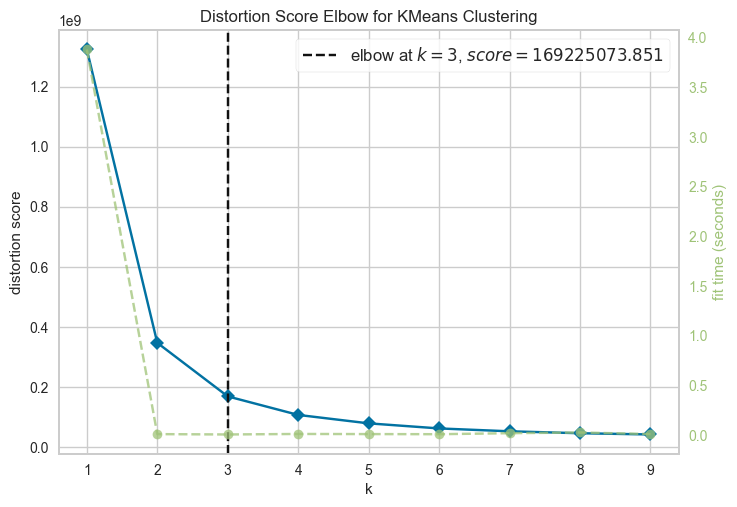

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Pilih fitur yang akan digunakan untuk clustering
features = df.select_dtypes(include=['float64', 'int64'])

# Visualisasi Elbow Method untuk menentukan jumlah cluster terbaik (misal range 1-10)
visualizer = KElbowVisualizer(model, k=(1,10))

# Fit data ke visualizer
visualizer.fit(features)

# Tampilkan plot
visualizer.show()


In [ ]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans

# Misalnya hasil dari Elbow Method menunjukkan jumlah cluster optimal adalah 3
n_clusters = 3

# Inisialisasi dan latih model KMeans
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
model_kmeans.fit(features)

# Tambahkan hasil cluster ke DataFrame
df['Cluster'] = model_kmeans.labels_

# Tampilkan hasil cluster pertama
print(df[['Cluster']].value_counts())


Cluster
0          856
1          831
2          828
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")


import joblib
joblib.dump(model_kmeans, "model_clustering.h5")


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

from sklearn.metrics import silhouette_score

# Menghitung silhouette score
score = silhouette_score(features, model_kmeans.labels_)

# Tampilkan nilai silhouette score
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5426


In [ ]:
# Membuat visualisasi hasil clustering

from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt
import joblib

# Load model KMeans yang sudah disimpan
model_kmeans = joblib.load("model_clustering.h5")

# Data fitur yang sudah discaling
features = df[numerik_cols]

# Buat visualizer Silhouette
visualizer = SilhouetteVisualizer(model_kmeans)

# Fit visualizer dengan data fitur
visualizer.fit(features)

# Tampilkan visualisasi
visualizer.show()





c:\Users\ADVAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Channel
- CustomerAge_binned_encoded
- CustomerOccupation
- Location
- PreviousTransactionDate
- ...


# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
# Load Dataset
url= "https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m"
df = pd.read_csv(url)  
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doctor                 81.0            1.0   
1         68.0             Doctor                141.0            1.0   
2         19.0            Student                 56.0            1.0   
3         26.0            Student                 25.0            1.0   
4          NaN            Student                198.0            1.0   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000

**Insight** : Dataset Transaksi Keuangan
*Tipe Data, Nilai Kosong, dan Struktur Dataset*
- Dataset memiliki 2.537 baris dan 16 kolom.
- Terdiri dari 11 kolom bertipe object (teks/waktu) dan 5 kolom float64 (numerik).
- Terdapat missing value pada hampir semua kolom, namun jumlahnya relatif kecil (< 2% per kolom) 

In [ ]:
# Pilih kolom numerik
numerik_df = df.select_dtypes(include=['int64', 'float64'])

# Tangani missing value dengan mengisi menggunakan rata-rata kolom
numerik_df = numerik_df.fillna(numerik_df.mean())

# Cek hasilnya setelah imputasi
print(numerik_df.head())
print(numerik_df.columns)
print(numerik_df.isnull().sum())  # cek sisa missing value


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0              14.09    70.000000                 81.0            1.0   
1             376.24    68.000000                141.0            1.0   
2             126.29    19.000000                 56.0            1.0   
3             184.50    26.000000                 25.0            1.0   
4              13.45    44.678444                198.0            1.0   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40  
Index(['TransactionAmount', 'CustomerAge', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance'],
      dtype='object')
TransactionAmount      0
CustomerAge            0
TransactionDuration    0
LoginAttempts          0
AccountBalance         0
dtype: int64


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# (Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

# 1. Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# 2. Menampilkan tipe data dan jumlah missing value per kolom
print("Informasi data:")
print(df.info())
print("\nJumlah missing value per kolom:")
print(df.isnull().sum())

# 3. Statistik deskriptif untuk kolom numerik
print("\nStatistik deskriptif fitur numerik:")
print(df.describe())

# 4. Visualisasi distribusi kolom numerik
import matplotlib.pyplot as plt
import seaborn as sns

numerik_df = df.select_dtypes(include=['int64', 'float64']).fillna(df.mean(numeric_only=True))



Jumlah baris dan kolom: (2537, 16)
Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            25

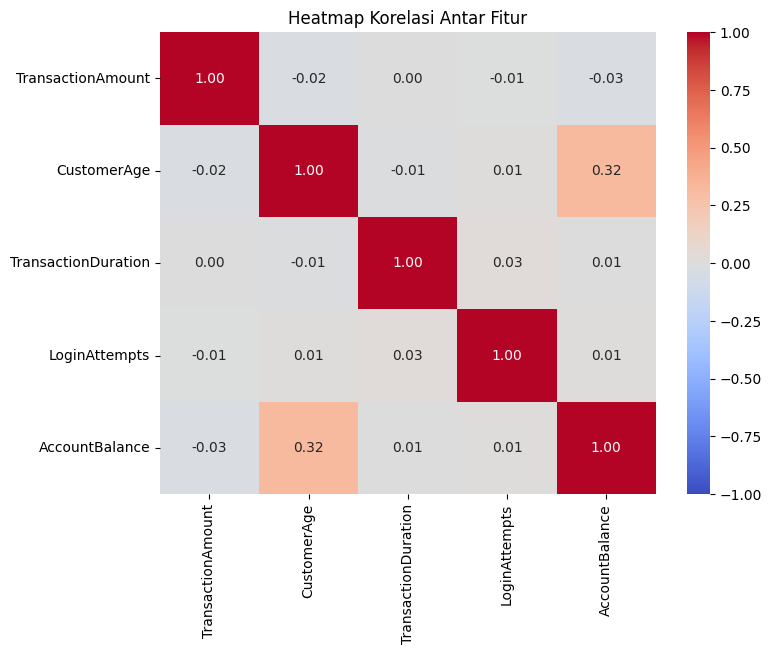

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

import matplotlib.pyplot as plt
import seaborn as sns

# Hitung korelasi antar fitur numerik (sudah diimputasi sebelumnya)
corr_matrix = numerik_df.corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()


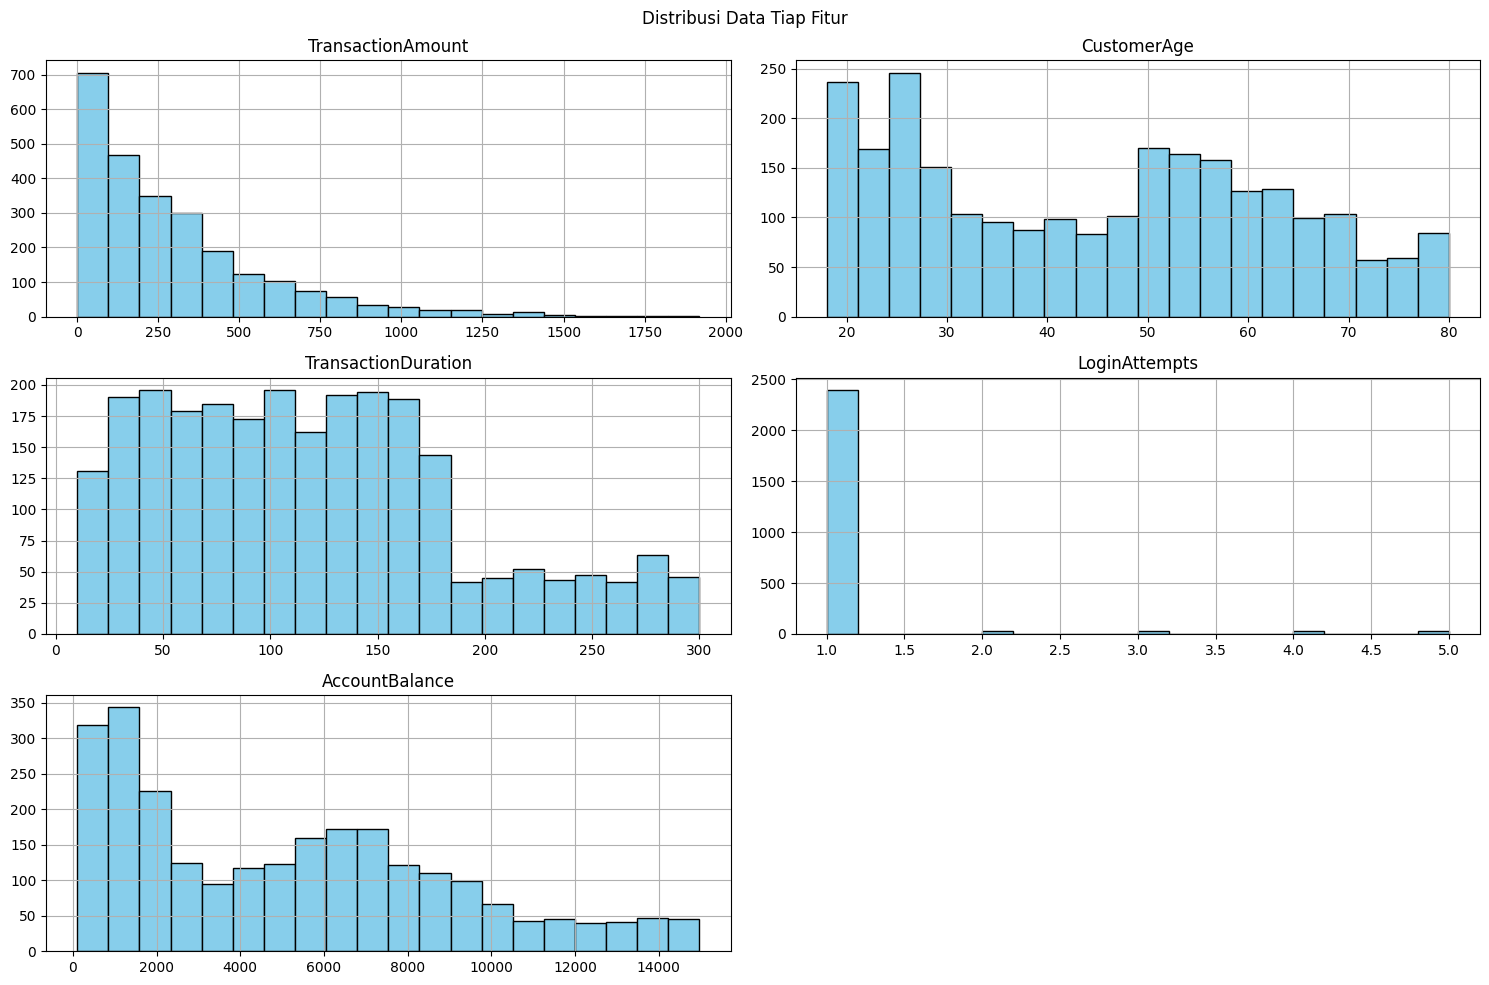

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

# Menampilkan histogram untuk semua kolom numerik
df.hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribusi Data Tiap Fitur")
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

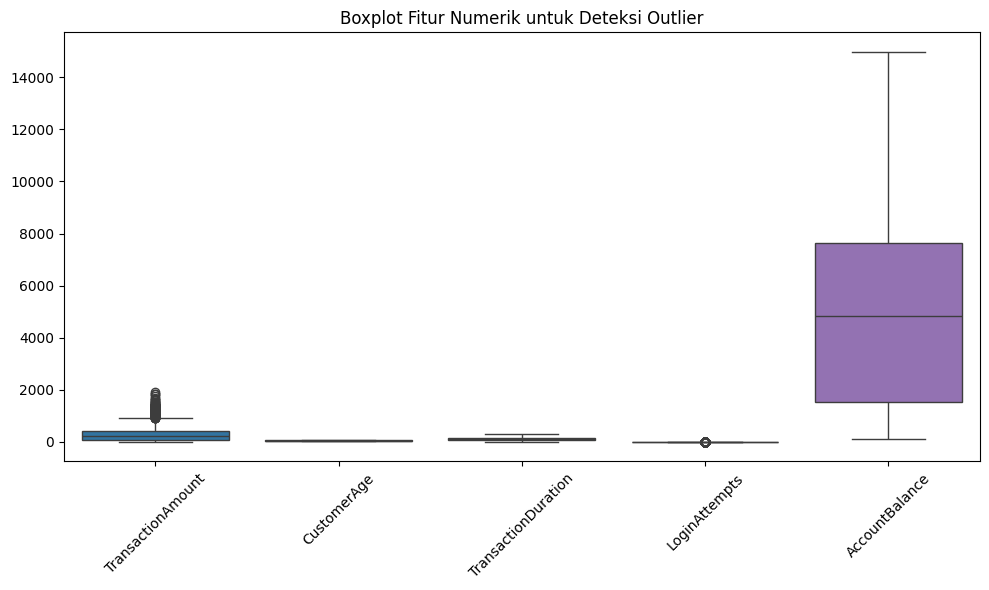

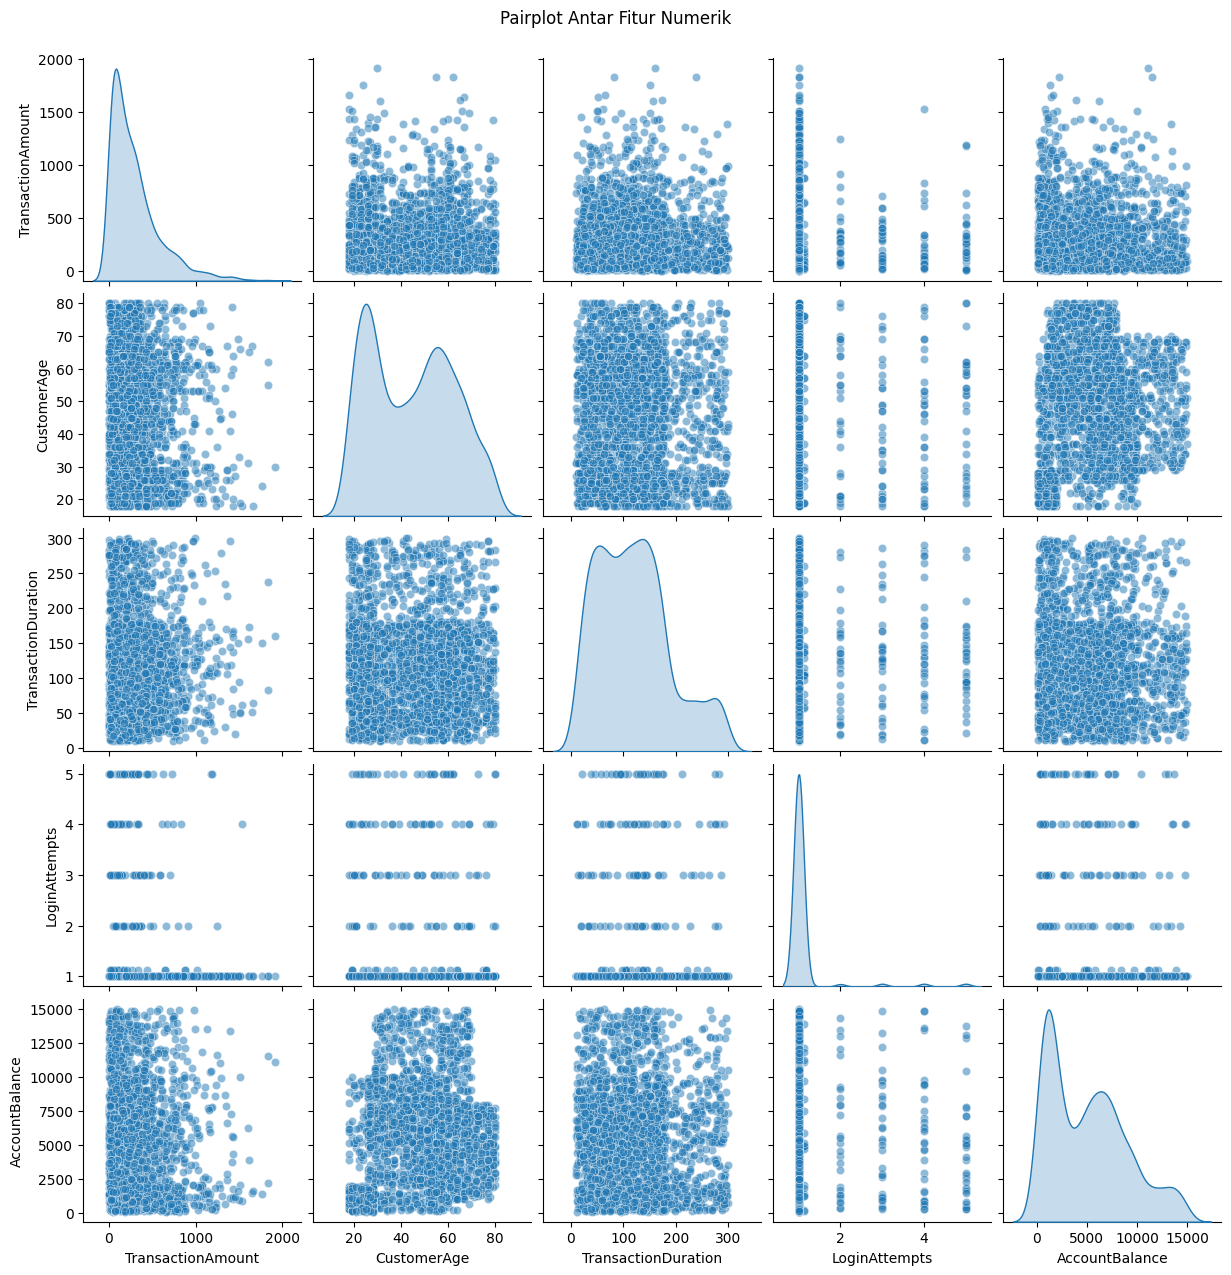

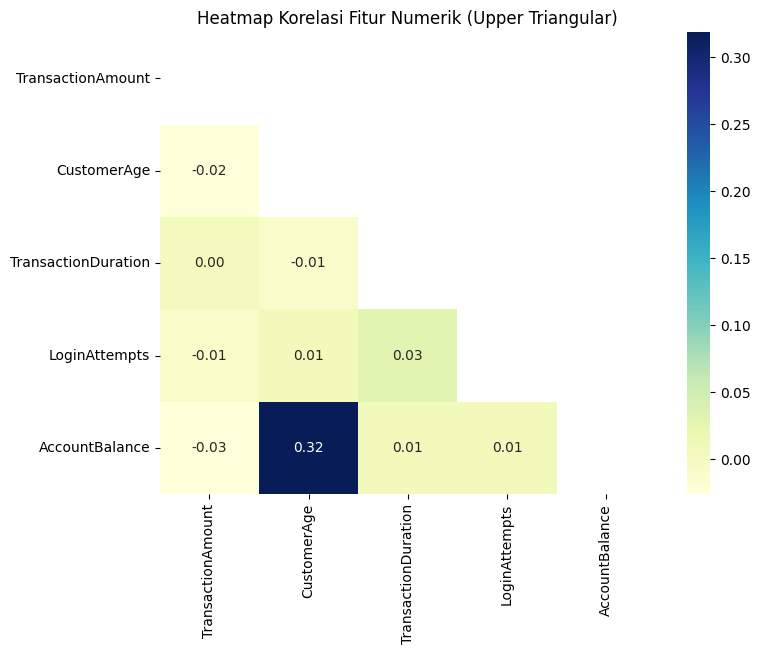

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Boxplot untuk deteksi outlier ---
plt.figure(figsize=(10, 6))
sns.boxplot(data=numerik_df)
plt.title('Boxplot Fitur Numerik untuk Deteksi Outlier')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Pairplot untuk melihat hubungan antar fitur ---
sns.pairplot(numerik_df, diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot Antar Fitur Numerik", y=1.02)
plt.show()

# --- 3. Korelasi heatmap dengan masking (upper triangle) ---
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(numerik_df.corr(), dtype=bool))
sns.heatmap(numerik_df.corr(), annot=True, cmap="YlGnBu", fmt=".2f", mask=mask)
plt.title('Heatmap Korelasi Fitur Numerik (Upper Triangular)')
plt.show()


# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
# Mengecek jumlah missing value per kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

Jumlah missing value per kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah data duplikat:")
print(df.duplicated().sum())


Jumlah data duplikat:
21


In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.

from sklearn.preprocessing import MinMaxScaler

# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Inisialisasi scaler
scaler = MinMaxScaler()

# Lakukan scaling pada kolom numerik
df[numerik_cols] = scaler.fit_transform(df[numerik_cols])

# Tampilkan 5 baris pertama hasil scaling
print(df[numerik_cols].head())


   TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
0           0.007207     0.838710             0.244828            0.0   
1           0.195940     0.806452             0.451724            0.0   
2           0.065680     0.016129             0.158621            0.0   
3           0.096016     0.129032             0.051724            0.0   
4           0.006874     0.429757             0.648276            0.0   

   AccountBalance  
0        0.336832  
1        0.918055  
2        0.068637  
3        0.569198  
4        0.492591  


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
df.drop(columns=[
    'TransactionID',
    'AccountID',
    'DeviceID',
    'MerchantID',
    'IP Address'
], inplace=True)


In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melakukan encoding.

from sklearn.preprocessing import LabelEncoder

# Pilih kolom kategorikal (tipe object)
kategorikal_cols = df.select_dtypes(include=['object']).columns

# Inisialisasi encoder
le = LabelEncoder()

# Loop encoding setiap kolom kategorikal
for col in kategorikal_cols:
    df[col] = le.fit_transform(df[col].astype(str))  # pastikan tipe string agar tidak error

# Tampilkan 5 baris pertama setelah encoding
print(df.head())


   TransactionAmount  TransactionDate  TransactionType  Location  Channel  \
0           0.007207              680                1        36        0   
1           0.195940             1178                1        15        0   
2           0.065680             1262                1        23        2   
3           0.096016              818                1        33        2   
4           0.006874             1939                0         1        2   

   CustomerAge  CustomerOccupation  TransactionDuration  LoginAttempts  \
0     0.838710                   0             0.244828            0.0   
1     0.806452                   0             0.451724            0.0   
2     0.016129                   3             0.158621            0.0   
3     0.129032                   3             0.051724            0.0   
4     0.429757                   3             0.648276            0.0   

   AccountBalance  PreviousTransactionDate  
0        0.336832                      105  
1 

In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()

df.columns.tolist()


['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

# Numerik: imputasi mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Kategorikal: imputasi modus
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values setelah imputasi:") 
print(df.isnull().sum())


Missing values setelah imputasi:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().

# Hapus data duplikat jika ada
df = df.drop_duplicates()
print("\nData setelah hapus duplikat:", df.shape)



Data setelah hapus duplikat: (2515, 11)


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

import pandas as pd
import numpy as np

# Copy data numerik biar aman
df_outlier = numerik_df.copy()

# Fungsi hitung outlier per kolom berdasarkan IQR
def detect_outliers_iqr(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col < lower_bound) | (col > upper_bound), lower_bound, upper_bound

# Threshold jumlah outlier untuk memutuskan drop atau capping
threshold = 20

# Simpan index baris yang outlier untuk drop
rows_to_drop = set()

# Loop tiap kolom numerik
for col in df_outlier.columns:
    outlier_mask, lower, upper = detect_outliers_iqr(df_outlier[col])
    n_outliers = outlier_mask.sum()
    print(f"Kolom '{col}' punya {n_outliers} outlier.")
    
    if n_outliers == 0:
        continue  # tidak ada outlier, lanjut
    
    if n_outliers < threshold:
        # Kalo sedikit, kumpulkan index baris outlier untuk nanti di-drop
        outlier_indices = df_outlier.index[outlier_mask].tolist()
        rows_to_drop.update(outlier_indices)
        print(f"  Drop {n_outliers} baris outlier di kolom '{col}'")
    else:
        # Kalo banyak, lakukan capping (winsorizing)
        print(f"  Lakukan capping outlier di kolom '{col}'")
        df_outlier.loc[df_outlier[col] < lower, col] = lower
        df_outlier.loc[df_outlier[col] > upper, col] = upper

# Drop semua baris outlier yang sudah terkumpul
print(f"\nTotal baris yang akan di-drop karena outlier: {len(rows_to_drop)}")
df_outlier_cleaned = df_outlier.drop(index=rows_to_drop).reset_index(drop=True)

print(f"\nJumlah data sebelum pembersihan outlier: {numerik_df.shape}")
print(f"Jumlah data setelah pembersihan outlier: {df_outlier_cleaned.shape}")

# Update numerik_df dengan data bersih outlier
numerik_df = df_outlier_cleaned


Kolom 'TransactionAmount' punya 114 outlier.
  Lakukan capping outlier di kolom 'TransactionAmount'
Kolom 'CustomerAge' punya 0 outlier.
Kolom 'TransactionDuration' punya 0 outlier.
Kolom 'LoginAttempts' punya 141 outlier.
  Lakukan capping outlier di kolom 'LoginAttempts'
Kolom 'AccountBalance' punya 0 outlier.

Total baris yang akan di-drop karena outlier: 0

Jumlah data sebelum pembersihan outlier: (2537, 5)
Jumlah data setelah pembersihan outlier: (2537, 5)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Binning pada kolom 'TransactionAmount' (nilai sudah antara 0 dan 1)
bins_amount = [-0.01, 0.1, 0.3, 0.6, 1.01]  # rentang bins harus monotonik naik
labels_amount = ['Very Low', 'Low', 'Medium', 'High']
df['TransactionAmount_binned'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount)

# Binning pada kolom 'CustomerAge' (nilai sudah antara 0 dan 1)
bins_age = [-0.01, 0.2, 0.4, 0.6, 1.01]
labels_age = ['Young', 'Adult', 'Middle Age', 'Senior']
df['CustomerAge_binned'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age)

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Encode hasil binning
df['TransactionAmount_binned_encoded'] = le.fit_transform(df['TransactionAmount_binned'].astype(str))
df['CustomerAge_binned_encoded'] = le.fit_transform(df['CustomerAge_binned'].astype(str))

# Tampilkan hasil binning dan encoding
print(df[['TransactionAmount', 'TransactionAmount_binned', 'TransactionAmount_binned_encoded']].head())
print(df[['CustomerAge', 'CustomerAge_binned', 'CustomerAge_binned_encoded']].head())


   TransactionAmount TransactionAmount_binned  \
0           0.007207                 Very Low   
1           0.195940                      Low   
2           0.065680                 Very Low   
3           0.096016                 Very Low   
4           0.006874                 Very Low   

   TransactionAmount_binned_encoded  
0                                 3  
1                                 1  
2                                 3  
3                                 3  
4                                 3  
   CustomerAge CustomerAge_binned  CustomerAge_binned_encoded
0     0.838710             Senior                           2
1     0.806452             Senior                           2
2     0.016129              Young                           3
3     0.129032              Young                           3
4     0.429757         Middle Age                           1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()

df.describe()


TransactionAmount  TransactionDate  TransactionType     Location  \
count        2515.000000      2515.000000      2515.000000  2515.000000   
mean            0.155028      1233.843738         0.776143    20.928429   
std             0.151664       718.117201         0.416910    12.194902   
min             0.000000         0.000000         0.000000     0.000000   
25%             0.043180       600.500000         1.000000    11.000000   
50%             0.111087      1228.000000         1.000000    21.000000   
75%             0.213326      1856.500000         1.000000    31.000000   
max             1.000000      2484.000000         1.000000    42.000000   

           Channel  CustomerAge  CustomerOccupation  TransactionDuration  \
count  2515.000000  2515.000000         2515.000000          2515.000000   
mean      0.989264     0.429575            1.521272             0.377701   
std       0.804401     0.286277            1.134477             0.240111   
min       0.000000     0.000000            0.000000             0.000000   
25%       0.000000     0.145161            0.500000             0.182759   
50%       1.000000     0.435484            2.000000             0.358621   
75%       2.000000     0.661290            3.000000             0.520690   
max       2.000000     1.000000            3.000000             1.000000   

       LoginAttempts  AccountBalance  PreviousTransactionDate  \
count    2515.000000     2515.000000              2515.000000   
mean        0.030674        0.337135               179.071571   
std         0.148619        0.260618               102.459964   
min         0.000000        0.000000                 0.000000   
25%         0.000000        0.095324                91.000000   
50%         0.000000        0.318555               178.000000   
75%         0.000000        0.506842               269.000000   
max         1.000000        1.000000               359.000000   

       TransactionAmount_binned_encoded  CustomerAge_binned_encoded  
count                       2515.000000                 2515.000000  
mean                           2.030616                    1.800795  
std                            0.969019                    1.047252  
min                            0.000000                    0.000000  
25%                            1.000000                    1.000000  
50%                            2.000000                    2.000000  
75%                            3.000000                    3.000000  
max                            3.000000                    3.000000

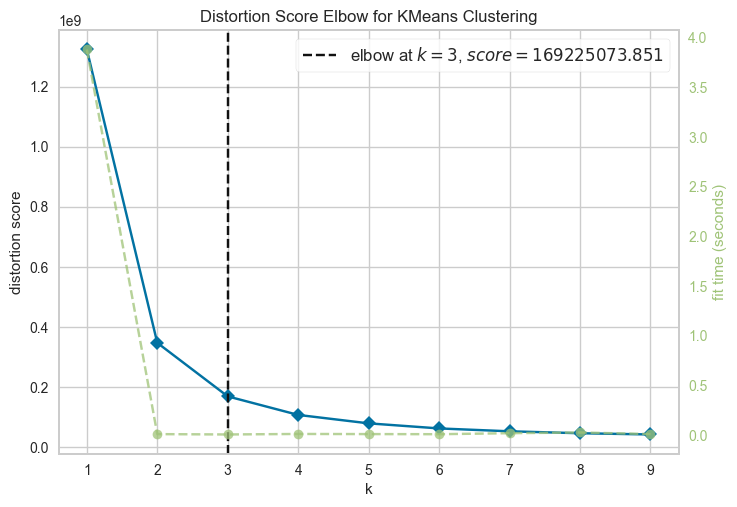

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Inisialisasi model KMeans
model = KMeans(random_state=42)

# Pilih fitur yang akan digunakan untuk clustering
features = df.select_dtypes(include=['float64', 'int64'])

# Visualisasi Elbow Method untuk menentukan jumlah cluster terbaik (misal range 1-10)
visualizer = KElbowVisualizer(model, k=(1,10))

# Fit data ke visualizer
visualizer.fit(features)

# Tampilkan plot
visualizer.show()


In [ ]:
# Menggunakan algoritma K-Means Clustering

from sklearn.cluster import KMeans

# Misalnya hasil dari Elbow Method menunjukkan jumlah cluster optimal adalah 3
n_clusters = 3

# Inisialisasi dan latih model KMeans
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
model_kmeans.fit(features)

# Tambahkan hasil cluster ke DataFrame
df['Cluster'] = model_kmeans.labels_

# Tampilkan hasil cluster pertama
print(df[['Cluster']].value_counts())


Cluster
0          856
1          831
2          828
Name: count, dtype: int64


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")


import joblib
joblib.dump(model_kmeans, "model_clustering.h5")


['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.

from sklearn.metrics import silhouette_score

# Menghitung silhouette score
score = silhouette_score(features, model_kmeans.labels_)

# Tampilkan nilai silhouette score
print(f"Silhouette Score: {score:.4f}")


Silhouette Score: 0.5426


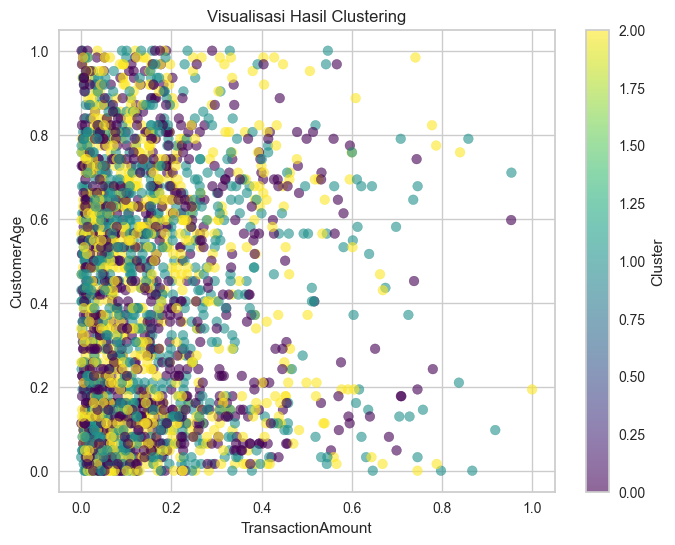

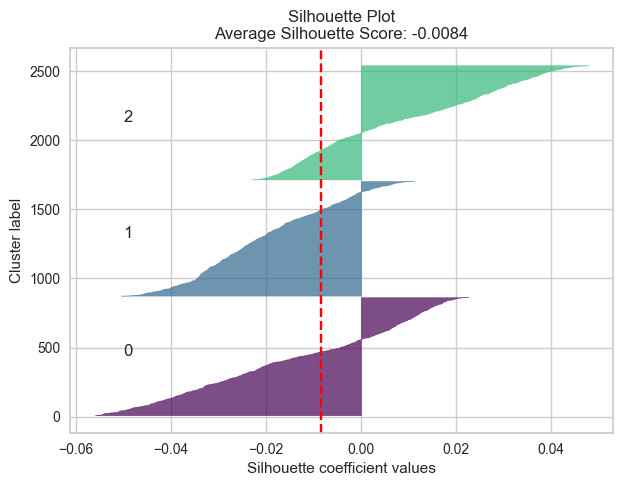

In [111]:
# Membuat visualisasi hasil clustering

import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Load model yang sudah disimpan
model_kmeans = joblib.load("model_clustering.h5")

# Pastikan df dan numerik_cols sama dengan yang kita pakai saat training model
features = df[numerik_cols].values  # Fitur numerik hasil scaling

# Ambil label cluster dari model
labels = model_kmeans.labels_

# --- Visualisasi Scatter Plot 2 fitur pertama ---
plt.figure(figsize=(8,6))
scatter = plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.xlabel(numerik_cols[0])
plt.ylabel(numerik_cols[1])
plt.title("Visualisasi Hasil Clustering")
plt.colorbar(scatter, label='Cluster')
plt.show()

# --- Visualisasi Silhouette Manual ---
silhouette_vals = silhouette_samples(features, labels)
n_clusters = model_kmeans.n_clusters
y_lower = 10

plt.figure(figsize=(7, 5))
for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    size_cluster = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster

    color = plt.cm.viridis(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)
    plt.text(-0.05, y_lower + size_cluster / 2, str(i))
    y_lower = y_upper + 10

score = silhouette_score(features, labels)
plt.axvline(x=score, color="red", linestyle="--")
plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster label")
plt.title(f"Silhouette Plot\nAverage Silhouette Score: {score:.4f}")
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

Explained variance ratio tiap komponen: [0.219393   0.16780446]


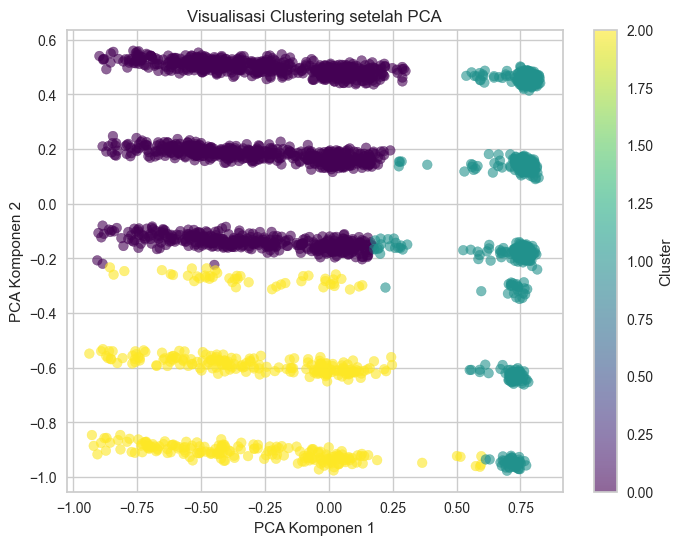

In [117]:
# Membangun model menggunakan PCA.

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Misal df sudah berisi data yang sudah dibersihkan dan diimputasi

# Pilih kolom numerik
numerik_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Scaling fitur numerik
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[numerik_cols])

# Terapkan PCA, misal ingin reduksi ke 2 komponen utama
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Explained variance ratio tiap komponen: {pca.explained_variance_ratio_}")

# Bangun model KMeans dengan jumlah cluster (misal 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)

# Visualisasi hasil clustering pada 2 komponen PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.6)
plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.title('Visualisasi Clustering setelah PCA')
plt.colorbar(label='Cluster')
plt.show()



In [121]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

import joblib

# Simpan model PCA ke file
joblib.dump(pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)